# Tarea Académica

In [25]:
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.cross_validation import KFold

from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC


In [29]:
def plotFeatures(X, headers):
    for i in range(X.shape[1]):
        data = [X[y==j,i] for j in range(10)]
        plt.figure()
        plt.boxplot(data)
        
        plt.ylabel(headers[i+4]) # faltan headers
        
         
        plt.show()

# Preprocesamiento de la Data

In [30]:
data = np.loadtxt('msd_genre_dataset.txt', dtype=bytes, delimiter=',', comments=None)
headers = np.array(data[0,:])
X = np.array(data[1:,4:].astype(np.float))
X = normalize(X)
classes = list(set(data[1:,0]))
y = np.array([classes.index(c) for c in data[1:,0]])

features = ['Volumen','Tempo','Compás','Tono','Modo','Duración','Timbre AVG','Timbre SUM']

promedios = np.zeros((len(classes),8))
timbres = np.zeros((len(classes),24))
for i in np.unique(y):
    promedios[i,:6] = np.mean(X[y == i,0:6], axis=0)
    timbres[i] = np.mean(X[y == i,6:], axis=0)
    promedios[i,6] = np.mean(timbres[i,:12])
    promedios[i,7] = np.mean(timbres[i,12:])
    
df = DataFrame(np.around(promedios,decimals=4), index=classes, columns=features)
df



['genre' 'track_id' 'artist_name' 'title' 'loudness' 'tempo'
 'time_signature' 'key' 'mode' 'duration' 'avg_timbre1' 'avg_timbre2'
 'avg_timbre3' 'avg_timbre4' 'avg_timbre5' 'avg_timbre6' 'avg_timbre7'
 'avg_timbre8' 'avg_timbre9' 'avg_timbre10' 'avg_timbre11' 'avg_timbre12'
 'var_timbre1' 'var_timbre2' 'var_timbre3' 'var_timbre4' 'var_timbre5'
 'var_timbre6' 'var_timbre7' 'var_timbre8' 'var_timbre9' 'var_timbre10'
 'var_timbre11' 'var_timbre12']


,Volumen,Tempo,Compás,Tono,Modo,Duración,Timbre AVG,Timbre SUM
jazz and blues,-0.0033,0.0273,0.0008,0.0012,0.0001,0.0769,-0.0000,0.2043
classic pop and rock,-0.0032,0.0384,0.0011,0.0016,0.0002,0.0715,0.0015,0.2169
classical,-0.0055,0.0290,0.0008,0.0013,0.0002,0.0824,-0.0003,0.2034
punk,-0.0034,0.0667,0.0015,0.0025,0.0003,0.0820,0.0030,0.2200
metal,-0.0032,0.0759,0.0020,0.0030,0.0003,0.1430,0.0035,0.2154
pop,-0.0023,0.0348,0.0011,0.0015,0.0002,0.0658,0.0013,0.2183
dance and electronica,-0.0024,0.0270,0.0008,0.0012,0.0001,0.0625,0.0005,0.2030
hip-hop,-0.0016,0.0255,0.0008,0.0013,0.0001,0.0445,0.0014,0.2197
soul and reggae,-0.0022,0.0281,0.0008,0.0012,0.0001,0.0558,0.0013,0.2208
folk,-0.0036,0.0371,0.0010,0.0015,0.0002,0.0683,0.0003,0.2176


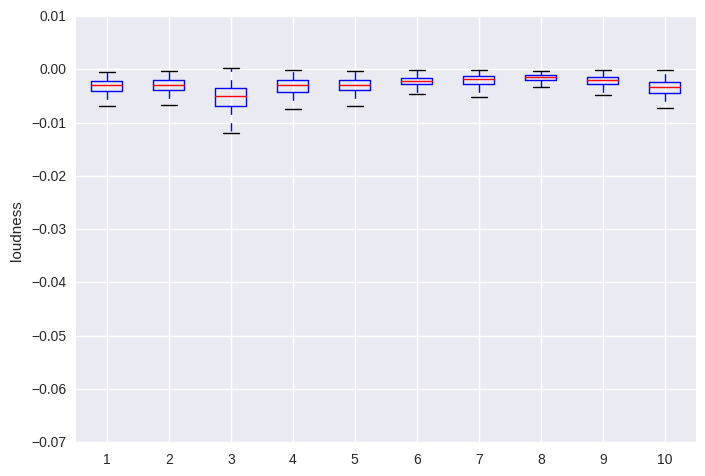

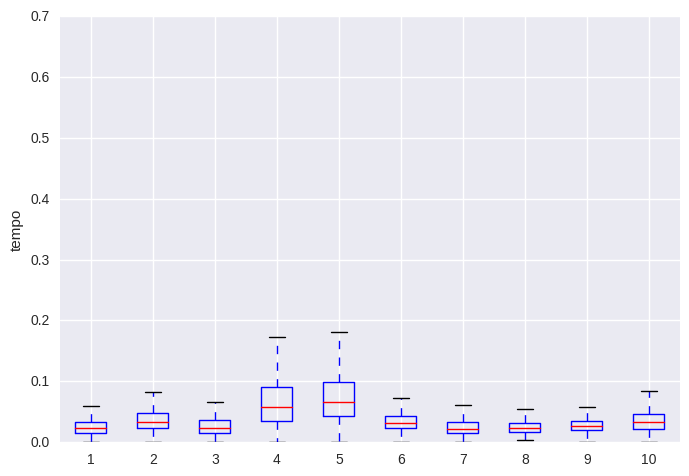

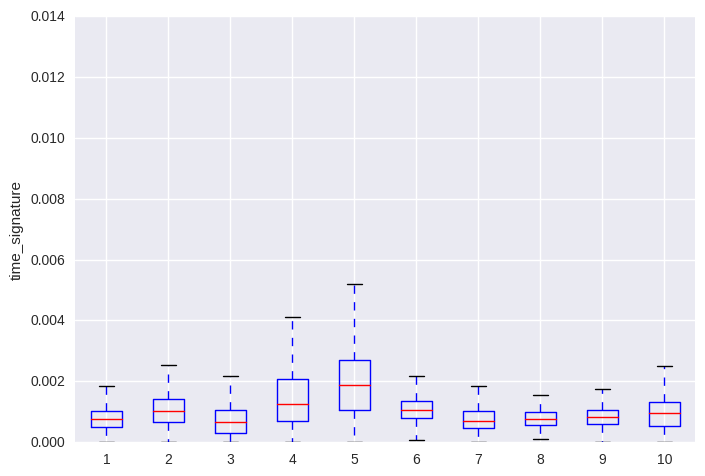

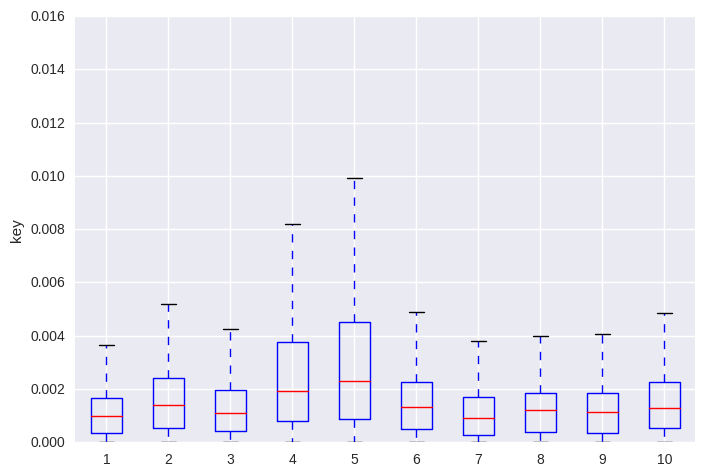

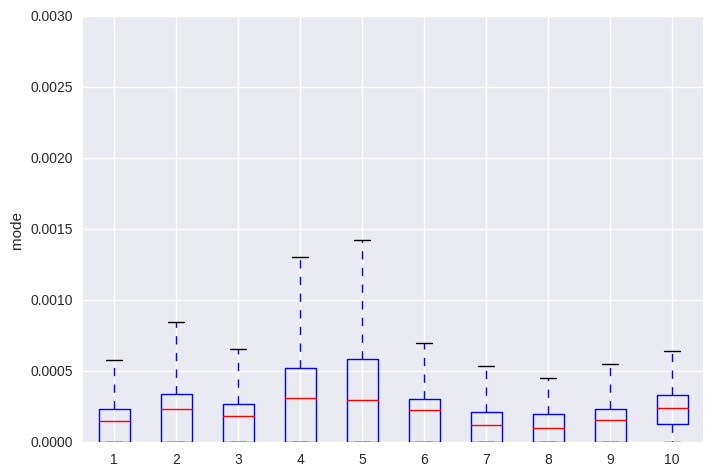

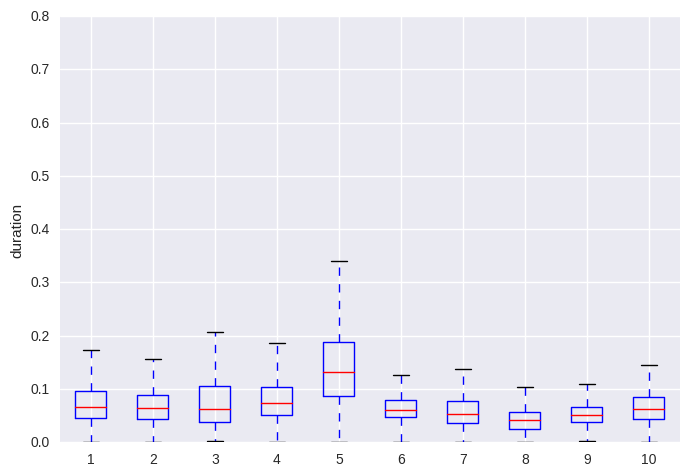

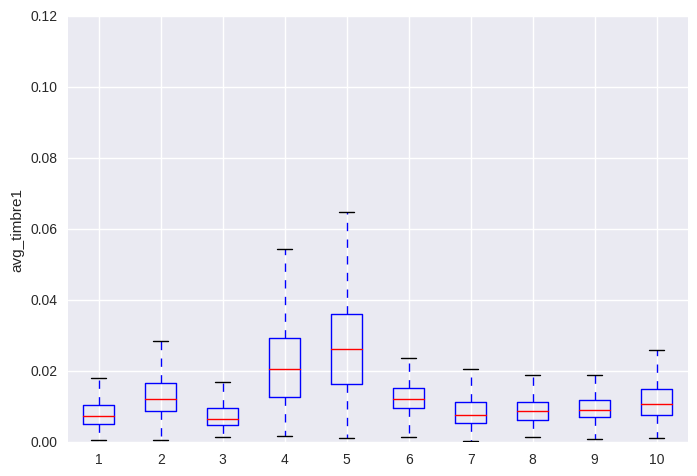

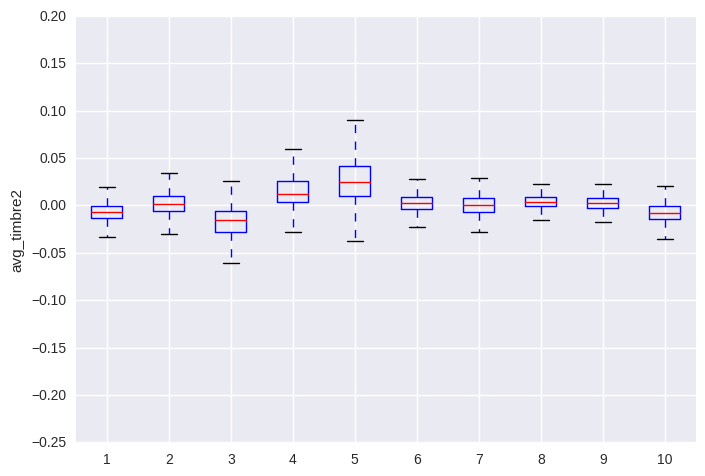

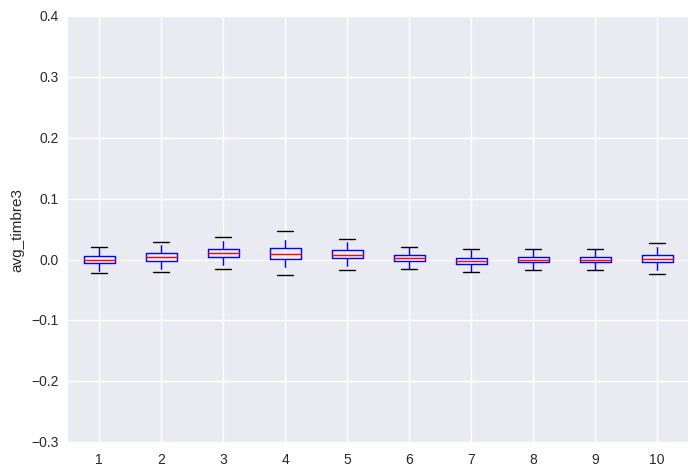

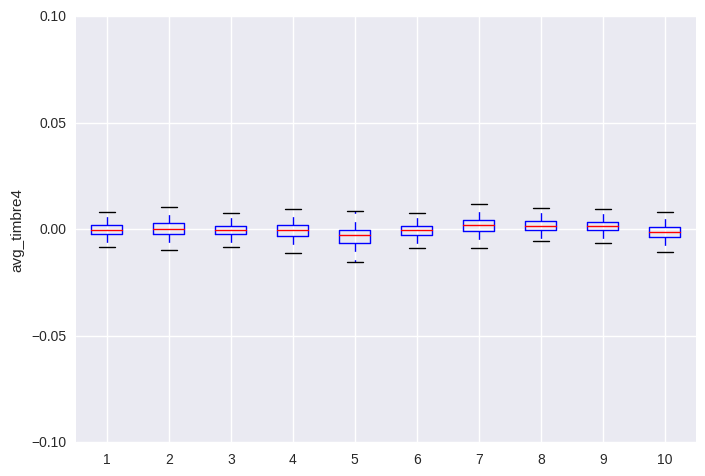

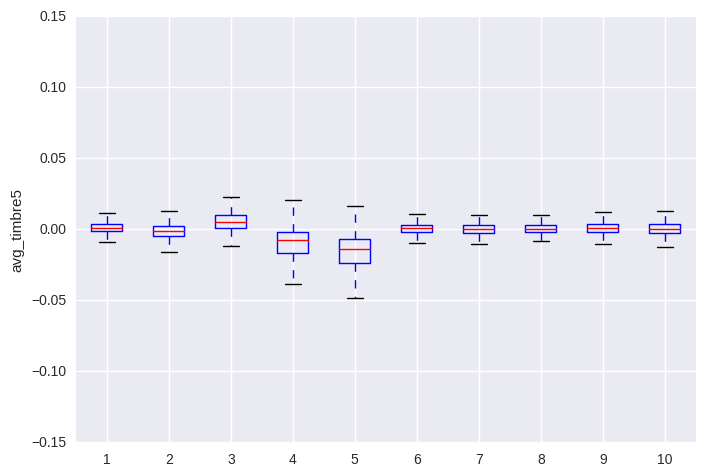

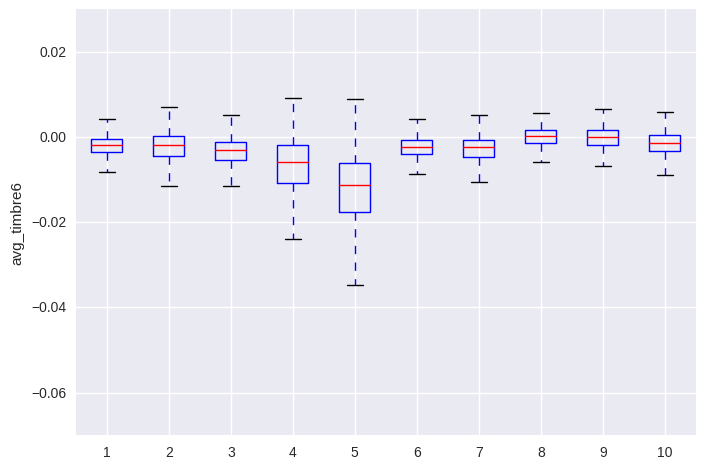

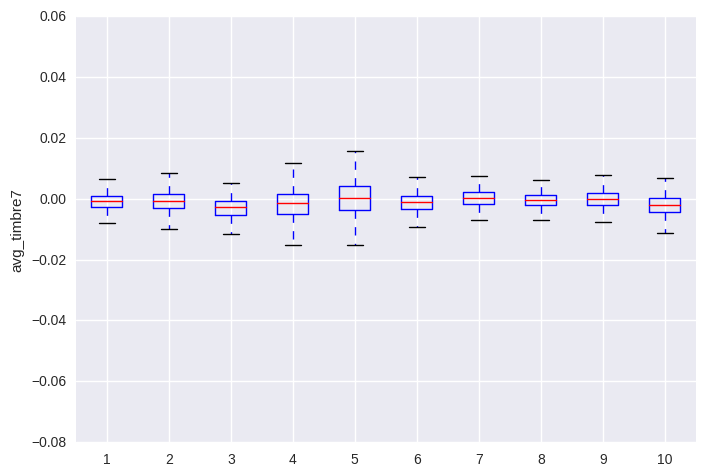

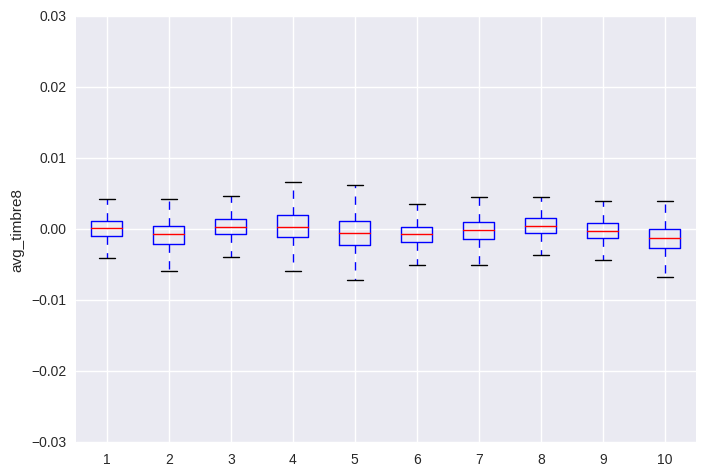

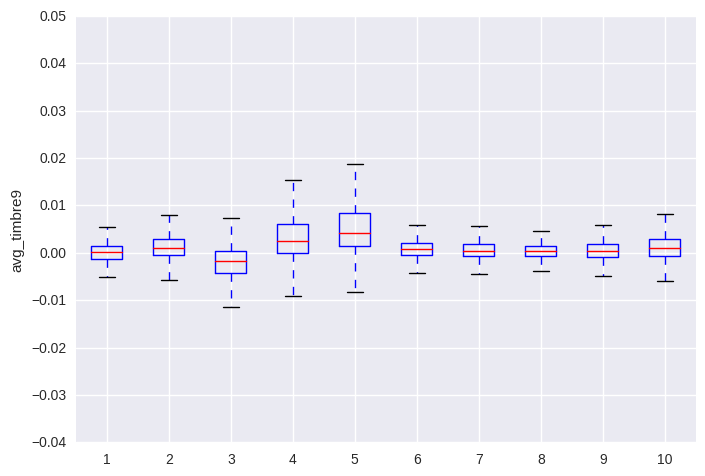

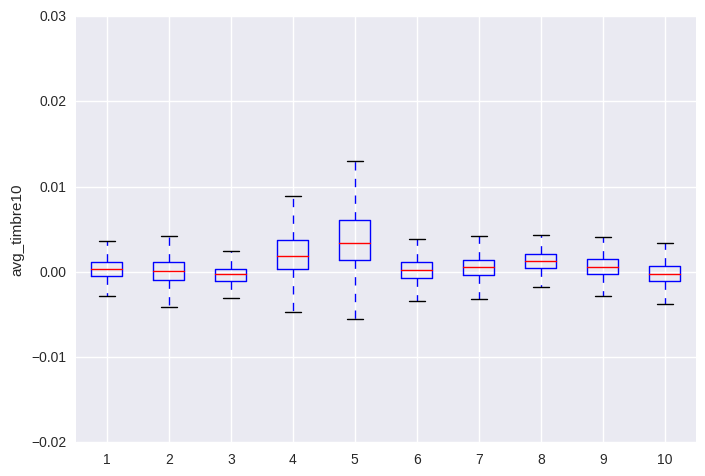

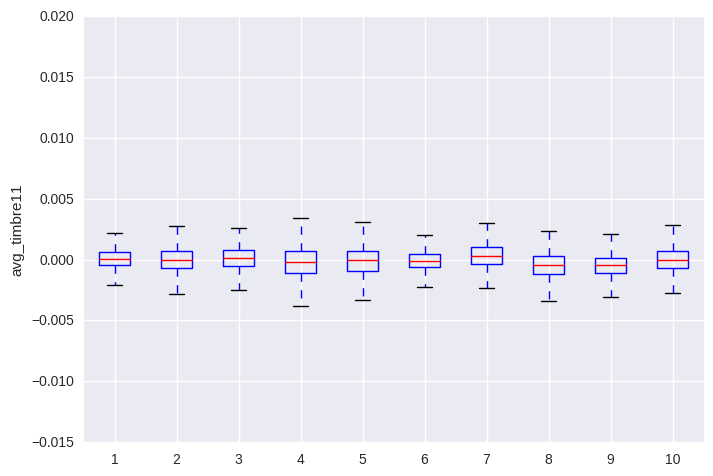

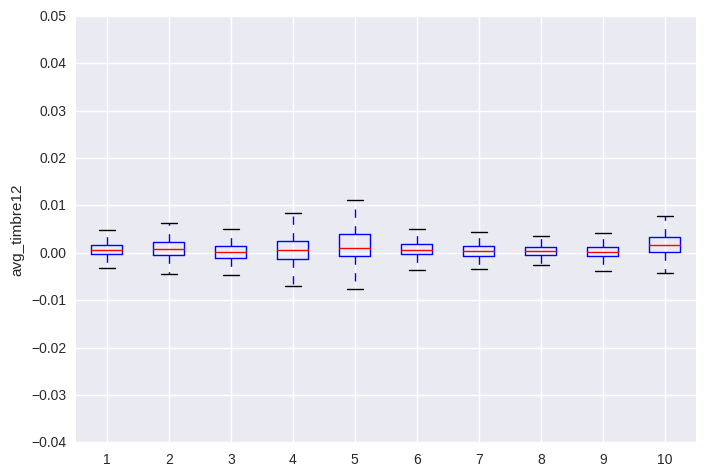

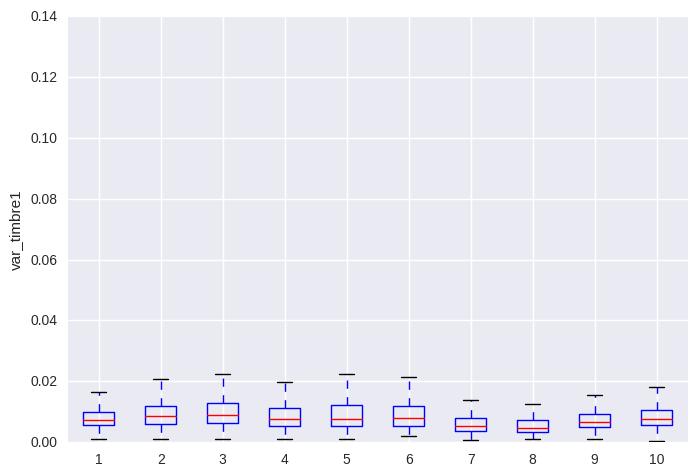

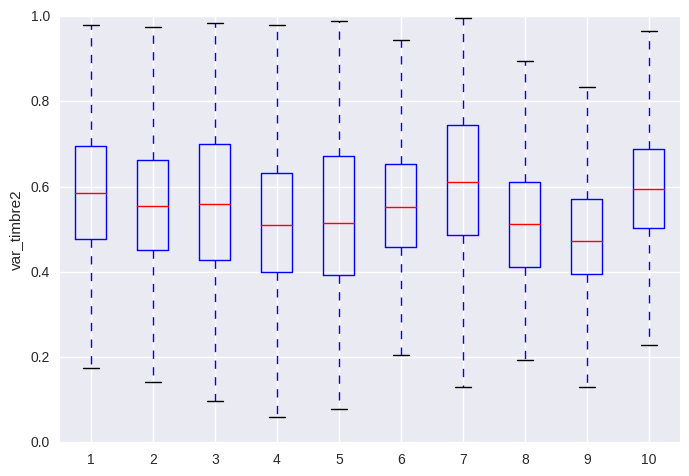

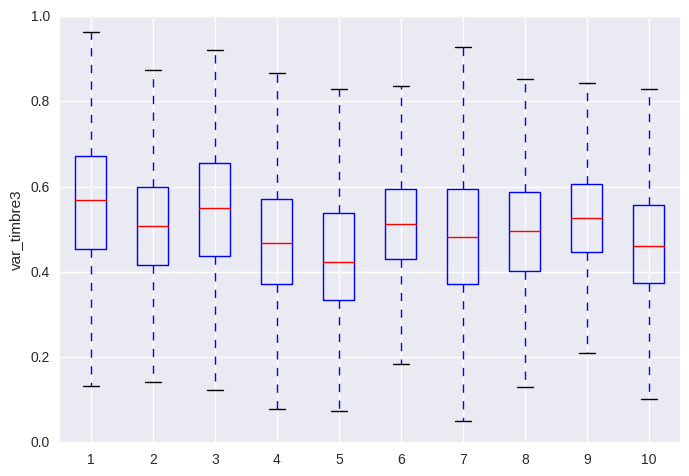

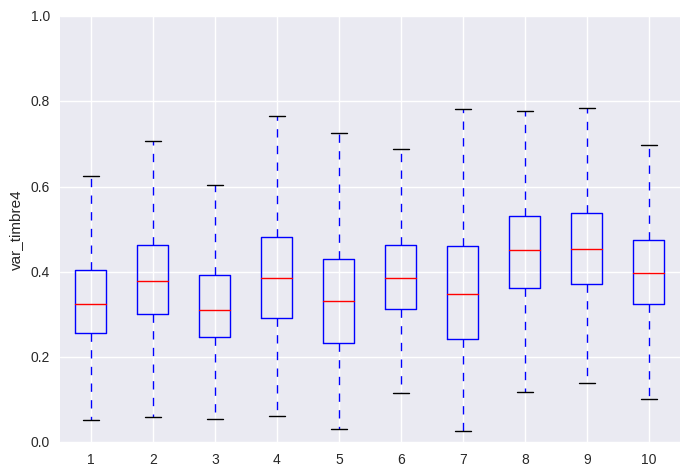

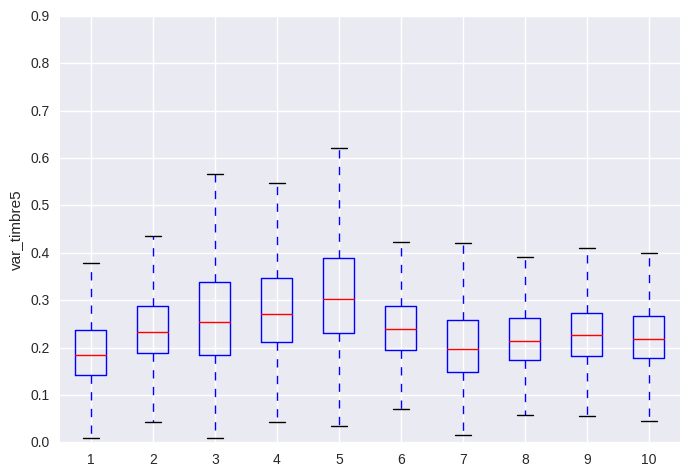

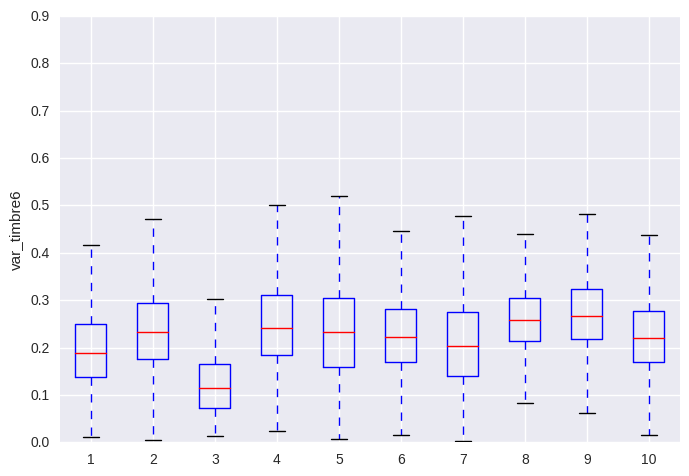

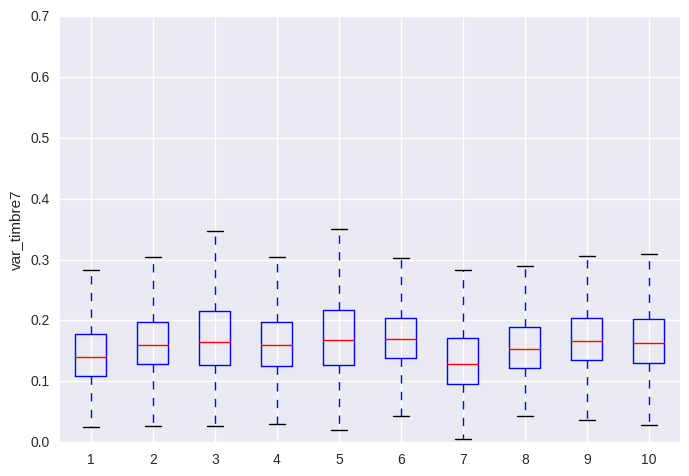

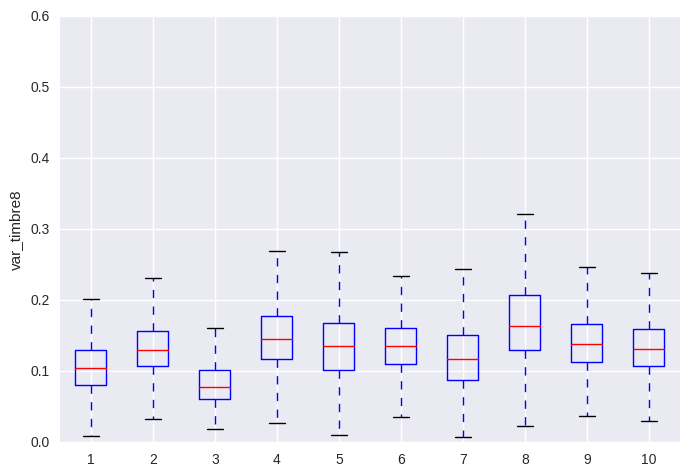

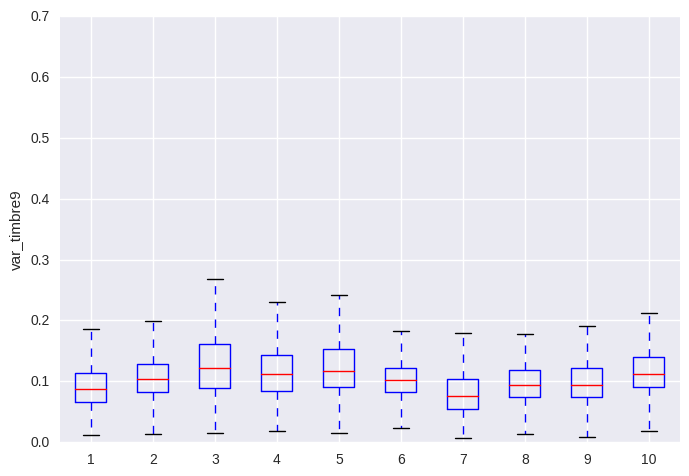

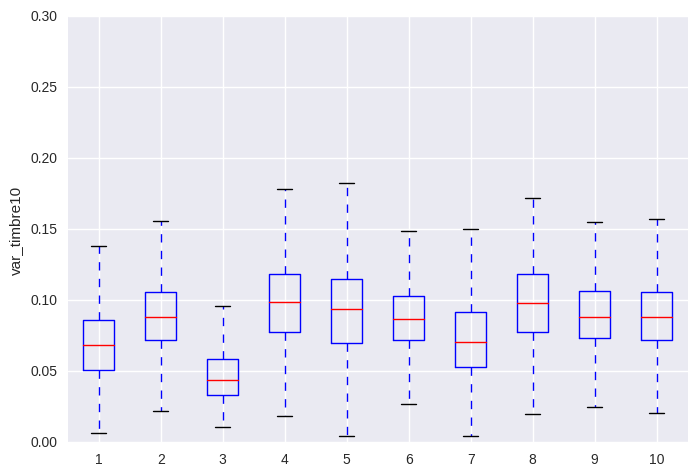

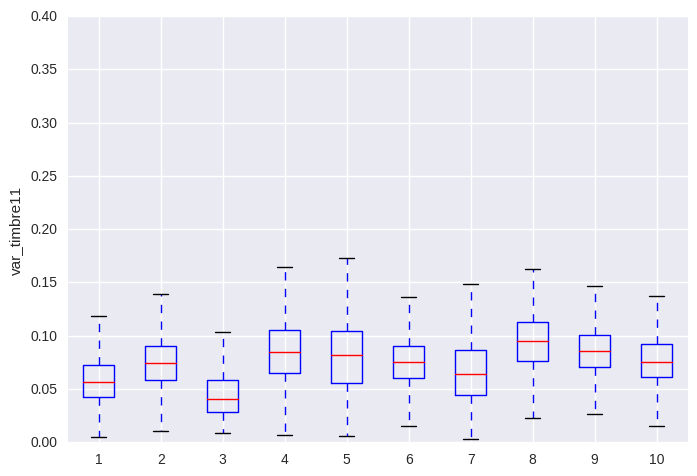

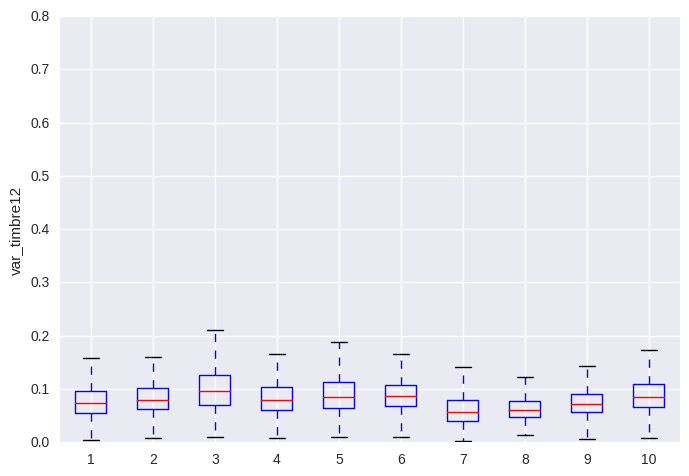

In [31]:
plotFeatures(X, headers)

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

X = np.array(np.c_[np.ones(data.shape[0]),X])
lr_ac_model = LogisticRegressionCV(penalty='l2', multi_class='ovr', dual = False, cv=10)
lr_ac_model.fit(X,y)
lr_ac = lr_ac_model.score(X,y)

lr_f1_model = LogisticRegressionCV(penalty='l2', multi_class='ovr', dual = False, cv=10, scoring='f1')
lr_f1_model.fit(X,y)
lr_f1 = lr_f1_model.score(X,y)

lr_re_model = LogisticRegressionCV(penalty='l2', multi_class='ovr', dual = False, cv=10, scoring='recall')
lr_re_model.fit(X,y)
lr_re = lr_re_model.score(X,y)


/home/renzo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

rf_ac = metrics.precision_score(ypred, ytest)
rf_f1 = metrics.f1_score(ypred, ytest)
rf_re = metrics.recall_score(ypred, ytest)

print(metrics.classification_report(ypred, ytest))


             precision    recall  f1-score   support

          0       0.48      0.62      0.54       515
          1       0.75      0.46      0.57      3432
          2       0.80      0.81      0.80       334
          3       0.53      0.70      0.60       590
          4       0.66      0.80      0.72       439
          5       0.05      0.68      0.09        28
          6       0.52      0.58      0.55       844
          7       0.04      1.00      0.08         4
          8       0.42      0.52      0.46       598
          9       0.53      0.61      0.57      1127

avg / total       0.63      0.56      0.58      7911



/home/renzo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/renzo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".


# Self Training

In [5]:
# 1. entrenamos 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,train_size=0.3, random_state=0)
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_train, y_train, test_size=0.5,train_size=0.3, random_state=0)
rbf_svc = SVC(kernel='rbf').fit(X_train_30, y_train_30)
y_pred_30 = rbf_svc.predict(X_test_30)

# 2. entrenamos 60%
X_train_60 = np.concatenate((X_train_30, X_test_30), axis=0)
y_train_60 = np.concatenate((y_train_30, y_pred_30), axis=0)
rbf_svc = SVC(kernel='rbf').fit(X_train_60, y_train_60)
y_pred = rbf_svc.predict(X_test)

# 3. scores
st_ac = metrics.precision_score(y_pred, y_test)
st_f1 = metrics.f1_score(y_pred, y_test)
st_re = metrics.recall_score(y_pred, y_test)

print(metrics.classification_report(y_pred, y_test))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.27      0.42     12657
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         0

avg / total       1.00      0.27      0.42     12657



/home/renzo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/renzo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".


# K means

/home/renzo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/renzo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/renzo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multi

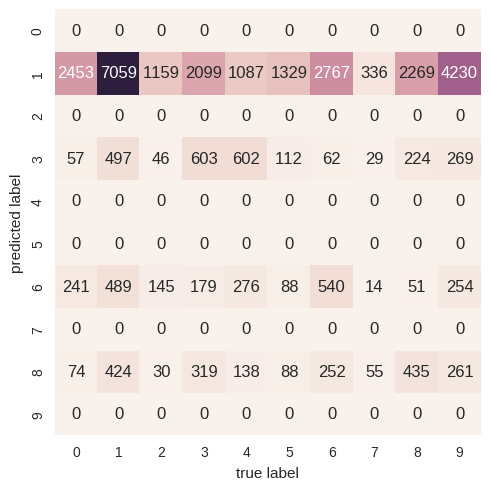

In [7]:
from sklearn.cluster import KMeans
from scipy.stats import mode
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. modelo
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X)

# 2. scores
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]    
km_ac = metrics.precision_score(y, labels)
km_f1 = metrics.f1_score(y, labels)
km_re = metrics.recall_score(y, labels)

# 3. matriz
mat = confusion_matrix(y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


# SVM 

In [37]:
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
pca = PCA(n_components=2)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

C = [1.0,5.0,9.0]  # SVM regularization parameter
gamma = [0.1,0.4,0.7]
degree = [1,5,8]

for i in range(len(C)):
    svc = svm.SVC(kernel='linear', C=C[i]).fit(X_t_train, y_train)
    y_predictSVC = svc.predict(X_t_test)
    print("Kernel: Linear C: {:f} accuracy {:f}".format(C[i],accuracy_score(y_test,y_predictSVC)))

svm_ac = metrics.precision_score(y_predictSVC, y_test)
svm_f1 = metrics.f1_score(y_predictSVC, y_test)
svm_re = metrics.recall_score(y_predictSVC, y_test)
print svm_ac
print svm_f1
print svm_re

Kernel: Linear C: 1.000000 accuracy 0.399832
Kernel: Linear C: 5.000000 accuracy 0.399832
Kernel: Linear C: 9.000000 accuracy 0.399832
1.0
0.571257341484
0.399832214765


/home/renzo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/renzo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".


# Resumen

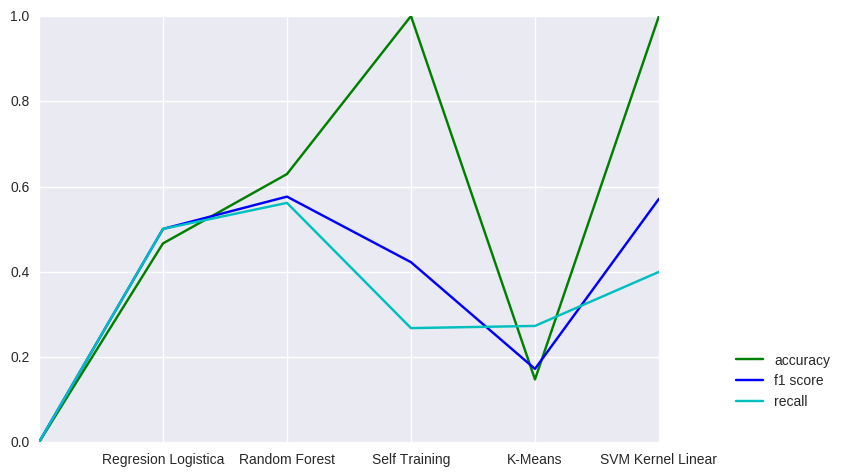

In [38]:
x = [0, 1, 2, 3, 4, 5]
my_xticks = ['','Regresion Logistica', 'Random Forest', 'Self Training', 'K-Means', 'SVM Kernel Linear']
plt.xticks(x, my_xticks)
plt.plot(x,[0,lr_ac, rf_ac, st_ac, km_ac, svm_ac], 'g', label='accuracy')
plt.plot(x,[0,lr_f1, rf_f1, st_f1, km_f1, svm_f1], 'b', label='f1 score')
plt.plot(x,[0,lr_re, rf_re, st_re, km_re, svm_re], 'c', label='recall')
plt.legend(loc='lower center',bbox_to_anchor=(1.2, 0.05))
plt.show()
